# **MATH&ML-10. Кластеризация и техники понижения размерности. Часть I**

# 1. Введение

✍ Представьте, что вы решили открыть бизнес, который занимается оказанием некоторых услуг (например, в сфере клининга или красоты). Дела идут хорошо, и в течение нескольких месяцев в вашей базе набирается несколько десятков тысяч клиентов. Разумеется, вам важно, чтобы все они пришли к вам ещё много раз, их средний чек повышался, а частота использования ваших услуг росла.

У вас есть два варианта:

* универсальное спецпредложение для всех клиентов;
* разные акции для разных клиентов.

Первый вариант очень прост. Примитивная акция «10 % скидка на всё!», скорее всего, увеличит количество желающих вновь воспользоваться вашими услугами. Однако данный подход не так эффективен и выгоден по сравнению с предложениями, более точно ориентированными на разных клиентов. Кому-то интереснее получить скидку на одну любимую услугу, а кто-то любит акции типа «купи два товара — получи третий бесплатно». Для одних клиентов актуальнее скидки по будням, а для других — в выходные. Вариантов масса, поэтому намного лучше создавать разные, более персонализированные предложения.

Итак, вы решили создать разные акции для разных клиентов. Однако, если клиентов много, придумать индивидуальную акцию для каждого просто невозможно. Так что разумным вариантом может стать формирование групп клиентов со схожими интересами и покупательским поведением и создание специального предложения для каждой такой группы.

Допустим, в базе данных есть следующая информация по каждому клиенту:

* возраст;
* адрес;
* средняя сумма покупки;
* среднее количество покупок;
* частота покупок;
* время и тип покупки.

На основе этих характеристик вы хотели бы объединить клиентов в группы.

![](https://lms.skillfactory.ru/assets/courseware/v1/eb988cddfa61edaf792e5047e3b1428b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_1_1.png)

Сделать это вручную практически невозможно, поэтому мы обратимся за помощью к машинному обучению, а именно — к **методам кластеризации**.

> **Кластеризация** — это задача группировки объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров, по какому-либо критерию.

⭐ Итак, вы немного повторили пройденный ранее материал, а значит, готовы идти дальше.

Основные цели этого модуля:

1. Более углублённо разобрать ряд уже знакомых вам методов кластеризации:
    * k-means,
    * EM-алгоритм,
    * DBSCAN,
    * агломеративные методы.
1. Изучить математическую составляющую и подробно рассмотреть алгоритмы реализации этих методов.
1. Отработать навыки решения задач кластеризации на двух объёмных кейсах.

Освоив данный модуль, вы будете обладать всеми навыками, необходимыми для успешного применения методов кластеризации при решении прикладных задач (например, при сегментации клиентов или выявлении аномалий в данных), а также будете понимать суть используемых алгоритмов.

# 2. K-Means

✍ В этом юните мы рассмотрим первый алгоритм кластеризации — k-means, или, как его ещё называют, **алгоритм k-средних**. Мы подробно изучим математическую составляющую данного метода, а также разберёмся с некоторыми его нюансами.

Напомним, что **идея** алгоритма k-means состоит в том, что он итеративно разбивает множество объектов на заранее заданное пользователем число кластеров и стремится минимизировать расстояние от объектов внутри кластера до центроида кластера.

В результате мы получаем сгруппированные по кластерам **точки** и **центроид** (его ещё иногда называют **центром тяжести**) для каждого кластера. Визуально это может выглядеть, например, так (на графике показано разделение на четыре кластера):

![](https://lms.skillfactory.ru/assets/courseware/v1/ac649e1ff12843430741c3fd457cba1b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_1.png)

K-means является самым популярным алгоритмом. Он широко применяется для:

* [сегментации изображений](https://www.sciencedirect.com/science/article/pii/S1877050915014143)
* [сегментации хромосом](https://www.ijser.org/paper/Chromosome-Segmentation-Using-K-Means-Clustering.html)
* [выявления ботов и аномалий](https://www.computerweekly.com/tip/Botnet-detection-through-DNS-behavior-and-clustering-analysis)
* [группировки новостных комментариев](https://ieeexplore.ieee.org/document/5591774/)

Далее мы повторим алгоритм k-means на простейшей визуализации, затем реализуем его самостоятельно на несложном вычислительном примере и наконец формализуем последовательность действий математически.

1. Предположим, у нас есть некоторое количество точек, расположенных на двухмерной плоскости:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/47852ea02731f7d7e30dad27664931c0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_2.png)

2. Будем считать, что у нас два кластера (как подбирается оптимальное число кластеров, мы обсудим позже). Выберем случайные точки, которые будут центроидами кластеров (это могут быть точки, принадлежащие нашим данным, или какие-то другие):

    ![](https://lms.skillfactory.ru/assets/courseware/v1/5484b8d2ade4cc7fcb465c5501795297/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_3.png)

3. Теперь для каждой точки рассчитаем расстояния до обоих центроидов и отнесём её к кластеру, центроид которого находится ближе к ней:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/fe78c10645fa527341b2537a7ab892fd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_4.png)

4. Для каждого кластера найдём новый центроид — такую точку, сумма квадратов расстояний до которой будет минимальной:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/4a26efa716b97fe1846fa03b9dc29e2c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_5.png)

5. Далее снова рассчитаем для каждой точки расстояния до обоих центроидов и отнесём её к тому кластеру, центроид которого находится ближе к ней (в результате некоторые точки «переходят» от одного кластера к другому):

    ![](https://lms.skillfactory.ru/assets/courseware/v1/95820dd2d5b9692e4ed8e436ac3908f7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_6.png)

6. Мы получили новые кластеры. Теперь найдём новые центроиды для этих кластеров:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/e78cfd1172f10a5b5412db99ac361bd2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_7.png)

7. Повторяя данные шаги до сходимости, получаем кластеры с объектами:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/a78d3ff745947da0df0632f98849be66/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_8.png)

Теперь давайте реализуем k-means самостоятельно на вычислительном примере.

1. Представим, что у нас есть четыре объекта ($A$, $B$, $C$ и $D$) и для каждого из них мы знаем значения двух признаков ($x_1$ и $x_2$). Например, это могут быть ученики, набравшие соответствующее количество баллов по двум тестированиям.

    /|$x_1$|$x_2$
    -|-|-
    A|2|3
    B|6|1
    C|1|2
    D|3|0
    

2. Будем считать, что наши данные можно разбить на два кластера (к первому отнесём $A$ и $B$, ко второму — $C$ и $D$).

    Выберем два центроида по следующему принципу:
    * Первый центроид (назовём его $AB$) как среднее арифметическое для $A$ и $B$.
    * Второй центроид (назовём его $CD$) как среднее арифметическое для $C$ и $D$.
    
    **Примечание**. Мы могли бы выбрать центроиды и по-другому (например, случайно), а потом уже определить первичный состав кластеров — именно так реализуется алгоритм k-means. Здесь же мы выбрали изначальные центроиды, отталкиваясь от некоторого предположения о распределении по кластерам — при решении задач «вручную» иногда используется такой подход.

    Для того чтобы найти координаты центроидов, выполняем следующие вычисления:

    * $x_1$ для $AB$:
        $\frac{(6+2)}{2}=4$
    * $x_2$ для $AB$:
        $\frac{(3+1)}{2}=2$
    * $x_1$ для $CD$:
        $\frac{(1+3)}{2}=2$
    * $x_2$ для $CD$:
        $\frac{(2+0)}{2}=1$

    В итоге получаем:
    /|$x_1$|$x_2$
    -|-|-
    AB|4|2
    CD|2|1

3. Теперь вычисляем квадрат евклидова расстояния от всех точек до обоих центроидов (т. е. всего восемь значений).

    **Примечание**. Напомним, что евклидово расстояние рассчитывается по следующей формуле:

    $$d(p, q)=\sqrt{\left(p_{1}-q_{1}\right)^{2}+\left(p_{2}-q_{2}\right)^{2}+\cdots+\left(p_{n}-q_{n}\right)^{2}}=\sqrt{\sum_{k=1}^{n}\left(p_{k}-q_{k}\right)^{2}}$$

    где $p$ и $q$ — точки в пространстве со следующими координатами:

    * $p=(p_{1}, ..., p_{n})$;
    * $q=(q_{1}, ..., q_{n})$.

    К примеру, квадрат евклидова расстояния от точки $A \ (2,3)$ до центроида $AB \ (4,2)$ будет вычисляться как:

    $$(2–4)^2+(3–2)^2=4+1=5$$
    
    Соберём все получившиеся результаты в таблицу:

    /|A|B|C|D
    -|-|-|-|-
    AB|5|5|9|5
    CD|4|16|2|2



4. Если внимательно посмотреть на получившиеся расстояния, можно увидеть, что, например, расстояние от $A$ до кластера $CD$ меньше, чем расстояние от $A$ до кластера $AB$. Поэтому перемещаем точку $A$ в кластер $CD$. Теперь у нас есть кластеры $B$ и $ACD$.

5. По аналогии с пунктом 2 данного решения пересчитаем центры кластеров как среднее арифметическое:

    * Значение $x_1$ для $B$ — $6$ (т. к. значение всего одно);
    * Значение $x_2$ для $B$ — $1$;
    * Значение $x_1$ для $ACD$: $\frac{(2+1+3)}{2} = 2$;
    * Значение $x_2$ для $ACD$: $\frac{(3+2+0)}{3} = 1.67$ (если округлить до сотых).

    Собираем результаты в таблицу:

6. K-means — итеративная процедура, так что теперь снова ищем расстояния от всех точек до новых центроидов. Вычисления будут аналогичны третьему шагу решения и будут давать следующие результаты:

    /|A|B|C|D
    -|-|-|-|-
    B|20|0|26|10
    ACD|1.78|16.44|1.11|3.78

7. В таблице выше мы видим, что теперь значения оптимальны: все точки распределяются по кластерам $(B, ACD)$ на основе их минимального расстояния до центроидов. На этом итеративная процедура заканчивается — мы решили задачу.


⭐ Отлично, мы разобрали пример решения задачи кластеризации с помощью алгоритма k-means. Теперь можно перейти к математической формулировке данного алгоритма.

Сначала давайте в целом сформулируем постановку задачи кластеризации:

* Пусть $X$ — это пространство объектов.
* $X^N = \{x_1,......x_N\}$ — обучающая выборка.
* $\rho:X\times X \rightarrow [0,\infty)$ — функция расстояния между объектами.

Необходимо найти:

* $Y$ — множество кластеров.
* $a : X → Y$ — алгоритм кластеризации, такой, что выполняются следующие условия:
    * каждый кластер состоит из близких (схожих между собой) объектов;
    * объекты разных кластеров существенно различаются.

Важно сразу обозначить, что решение задачи кластеризации очень неоднозначно, так как:

* много критериев для оценки качества (мы подробно поговорим о них в следующем модуле);
* много эвристических (не обусловленных математической теорией) методов кластеризации;
* обычно число кластеров неизвестно заранее (мы сами определяем его);
* результат кластеризации сильно зависит от параметров, которые также являются эвристиками.

Несмотря на это, кластеризация всё равно популярна и часто используется при решении прикладных задач, так как позволяет упрощать обработку данных, сокращать их объём, выделять нетипичные объекты и строить иерархию для множества объектов.

Теперь давайте перейдём к математической составляющей алгоритма k-means.

Будем делать это согласно следующей процедуре (она носит название **алгоритма Ллойда** — именно этот алгоритм используется в sklearn):

Дана выборка $x_1, ..., x_N$.

Параметр, который мы задаём для инициализации алгоритма, — число кластеров $K$: $K=\left|Y\right|$.

В качестве результата мы хотим получить центры кластеров $\mu_{k}$ и метки $k\in Y$.

1. Задаём начальные приближения центров $$ для всех $$ (например, случайным образом).
2. Повторяем по очереди:
    * Относим каждый объект к ближайшему центру:

    **Примечание**. Ближайший центр — это центр, до которого евклидово расстояние минимально.

    * Перемещаем центр каждого кластера в центр тяжести:

    **Пояснение**. В числителе суммируются все точки, которые принадлежат кластеру, для которого мы ищем центроид ($[k_i = k]$ проверяет принадлежность кластеру $k$), а в знаменателе суммируется их количество. В итоге получается отношение суммы и количества — это и есть среднее арифметическое. Работа алгоритма закончится тогда, когда выполнится число заданных заранее итераций или когда кластеры и центроиды перестанут изменяться.

Для того чтобы запустить алгоритм кластеризации k-means, нам нужна библиотека sklearn и модуль [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Что необходимо для запуска?

* Задать количество кластеров, на которые необходимо разделить данные.
* Данные, т. е. параметры объектов (), которые мы будем передавать в виде матрицы наблюдений $X$.

**Пример.**

```py
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
```
* n_clusters — количество кластеров;
* n_init — количество итераций алгоритма k-means;
* random_state — параметр для воспроизводимости результатов от запуска к запуску.

У алгоритма k-means есть ряд недостатков:

* число кластеров надо знать заранее;
* очень чувствителен к первичному выбору центроидов;
* не гарантирует достижения глобального минимума суммы квадратов расстояний, периодически «застревает» в локальном минимуме.

Также у k-means есть вариации, которые применяются в некоторых специфических случаях.

## MINI-BATCH K-MEANS

Данная вариация k-means используется, когда данных очень много. Из-за их объёма вычисление центров по всей выборке занимает много времени.

Для решения этой проблемы k-means на каждом шаге работает с небольшой подвыборкой данных. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим k-means. Обычно разница в кластеризации методом Mini-Batch K-means и классическим k-means заключается в пограничных точках близко расположенных кластеров:

![](https://lms.skillfactory.ru/assets/courseware/v1/3780e003bb074b032b9076244adf67f1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_10.png)

Источник изображения
Для того чтобы запустить алгоритм кластеризации Mini-Batch K-means, нам нужна библиотека sklearn и модуль [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html). Его применение и параметры аналогичны классическому Kmeans. Отличие лишь в том, что можно дополнительно настроить объём подвыборки:


```py

# два кластера и подвыборки объёма 6

kmeans = MiniBatchKMeans(n_clusters=2,random_state=42,batch_size=6)

## K-MEANS++

Данную вариацию k-means используют, если признаков очень много.

Результат и время работы алгоритма зависят от изначального выбора центроидов. Чтобы минимизировать затраты, будем действовать следующим образом:

1. Первый центроид выбираем случайным образом.
2. Для каждой точки вычисляем квадрат расстояния до ближайшего центроида из тех, что уже поставлены.
3. Далее из этих точек выбираем следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния.
4. Когда все точки выбраны, реализуем k-means.

По умолчанию при запуске k-means в sklearn используется именно алгоритм k-means++. Выбор алгоритма задаётся через параметр init:

* init='random' — для классической версии k-means;
* init='k-means++' — для вариации k-means++.

Итак, мы рассмотрели алгоритм реализации кластеризации, и, надеемся, теперь он вам полностью понятен. Однако остался важный вопрос: как определить количество кластеров?

Ниже можно увидеть формулу суммы квадратов всех расстояний от точек $x_i$ до центров кластеров  $C_k$, к которым принадлежат данные точки. Это значение ещё называют **инерцией**.

$$J(C)=\sum_{k=1}^{K} \sum_{i \in C_{k}}\left\|x_{i}-\mu_{k}\right\|^{2} \rightarrow \min _{C}$$

При реализации алгоритма k-means для получения значения инерции используется атрибут inertia_. Например, в одном из предыдущих модулей мы создавали функцию, чтобы находить значения инерции для разного количества кластеров:

```py
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia
```

Разумеется, чем меньше эта величина, тем лучше. Однако здесь есть большая проблема: минимальное значение этой функции будет достигаться тогда, когда количество кластеров будет равняться количеству объектов (т. е. каждый кластер будет состоять из одной точки и расстояния будут нулевыми). Это уже будет ситуация переобучения, так как алгоритм чересчур сильно подстроится под данные.

Для решения этой проблемы была выведена следующая эвристика: берётся такое число кластеров, начиная с которого значение функционала $J(C)$ уменьшается уже не так быстро. Формально это можно записать следующим образом:

$$D(k)=\frac{\left|J\left(C_{k}\right)-J\left(C_{k+1}\right)\right|}{\left|J\left(C_{k-1}\right)-J\left(C_{k}\right)\right|} \rightarrow \min _{k}$$

Визуально это можно представить так:

![](https://lms.skillfactory.ru/assets/courseware/v1/38b05d8e9702c2acd9c1c3b394c439a2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_11.png)



Можно увидеть, что инерция очень сильно уменьшается при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так значительно — при изменении $k$ с 3 до 4. То есть перегиб здесь находится в точке 3, и это значит, что три кластера — оптимальный вариант.

Однако важно отметить, что с помощью метода локтя не всегда получается определить оптимальное количество кластеров, так как не всегда есть этот перегиб. Как быть в таком случае? Какое оптимальное количество кластеров выбрать?

Если в ходе решения задачи вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

Для того чтобы его вычислить, используется следующая формула:

$$s_i=\frac{(b_i-a_i)}{max(a_i,b_i)}$$

где:

* $a_i$ — среднее расстояние от данного объекта  до объектов из того же кластера;
* $b_i$ — среднее расстояние от данного объекта  до объектов из другого ближайшего кластера.

Для вычисления коэффициента силуэта используется [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Вспомним функцию из предыдущего модуля по кластеризации, которую мы использовали для расчёта значений коэффициента силуэта для разного количества кластеров:

```py
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))
```

Коэффициент силуэта обладает следующими свойствами:

* Значение коэффициента находится в диапазоне от $-1$ до $+1$, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами.
* Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной.
* Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много/мало или данные просто плохо поддаются разделению на кластеры.

Для получения итогового значения рассчитывается среднее значение силуэта для всего датасета.

Соответственно, для определения оптимального количества кластеров мы будем искать самую высокую точку на графике коэффициента силуэта (ведь чем больше коэффициент, тем лучше). Например, здесь наиболее подходящее количество кластеров — 3:

![](https://lms.skillfactory.ru/assets/courseware/v1/e7969356e53086f2f8746368d6d398a8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_2_12.png)

⭐ Итак, мы подробно разобрали, как работает алгоритм k-means, узнали, какие у него есть вариации и как найти оптимальное количество кластеров. Теперь вы можете решить задачу кластеризации с использованием данного метода и чётко понимаете, какими будут действия на каждой итерации. В следующем юните мы подробно рассмотрим EM-алгоритм, а после потренируемся применять изученные алгоритмы на практической задаче →

# 3. EM-алгоритм

✍ Мы уже изучили один из алгоритмов кластеризации — k-means. Однако он не всегда может помочь нам выделить кластеры. Например, когда данные распределены в форме вытянутых эллипсов, k-means не справляется с кластеризацией:

![](https://lms.skillfactory.ru/assets/courseware/v1/72322fbdd9951ad77a85c07760313285/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_1.png)

В таком случае в качестве альтернативы можно взять один из алгоритмов кластеризации EM (Expectation-maximization) — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в которой данные описываются законом нормального распределения. В этом юните мы подробнее изучим этот алгоритм и разберёмся с каждым шагом его реализации.

Эту модель часто используют, к примеру, при [детекции кибератак](https://www.sciencedirect.com/science/article/pii/S0306457321003162?casa_token=cc0mSLplg5oAAAAA:OGKhkI62CsAC558Ecj9iYu4-XfJx_Wug01ai_AZHP-eHHew6x8DA4ITTfAxIRxkt1OvM1GBfLbk) или [выявлении нетипичных физиологических паттернов](https://www.sciencedirect.com/science/article/pii/S0306457321003162?casa_token=cc0mSLplg5oAAAAA:OGKhkI62CsAC558Ecj9iYu4-XfJx_Wug01ai_AZHP-eHHew6x8DA4ITTfAxIRxkt1OvM1GBfLbk).

Для начала давайте попробуем разобраться с методом интуитивно, а затем перейдём к его математической составляющей.

Предположим, что у нас есть набор некоторых объектов и мы знаем, что они получены из нескольких различных распределений Гаусса. Разумеется, знай мы, какие точки из какого распределения Гаусса получены, мы смогли бы использовать их для того, чтобы найти параметры каждого распределения. С другой стороны, если бы мы знали параметры этих распределений Гаусса, то могли бы предположить, к какому распределению относятся рассматриваемые точки.

Таким образом, нам необходимы параметры распределения, чтобы идентифицировать принадлежность точек, и необходимо знать принадлежность точек, чтобы вычислить параметры распределения. Такой парадокс немного напоминает извечный риторический вопрос о курице и яйце. Но если проверить, что возникло раньше — курица или яйцо — мы не сможем, то разобраться с нашей дилеммой нам позволит ЕМ-алгоритм.

Рассмотрим принцип реализации данного алгоритма на примере кластеризации нескольких точек, находящихся в одномерном пространстве:

![](https://lms.skillfactory.ru/assets/courseware/v1/60910d984c2d0c7ee91a278575fb25fd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_2.png)

Возьмём два случайно сгенерированных распределения Гаусса (изображены на рисунке ниже синим и жёлтым цветом).

**Примечание**: распределение Гаусса (нормальное распределение) обсуждалось ранее [в модуле по теории вероятностей](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/d3dbeff6ee8d48f48b3f3c14e6661f52).

![](https://lms.skillfactory.ru/assets/courseware/v1/b41662d3d6b1a35a19cb5299d01aa168/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_3.png)

Попытаемся выяснить, с какой вероятностью каждая точка принадлежит к синему или жёлтому распределению. Синей пунктирной линией отображено апостериорное распределение вероятностей принадлежности точек к синему распределению (оно имеет форму сигмоиды и принимает значения от 0 до 1).

Например, рассмотрим точку, закрашенную красным цветом. Скорее всего, с наибольшей вероятностью её можно будет отнести к синему распределению (просто потому, что синее распределение располагается ближе к этой точке).

![](https://lms.skillfactory.ru/assets/courseware/v1/b03a56ea867f24e8ae829c386c0ed752/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_4.png)

Однако у точки, выделенной красным на следующем рисунке, явно гораздо больше шансов попасть в жёлтое распределение, чем в синее, так как она находится ближе к математическому ожиданию жёлтого распределения.

![](https://lms.skillfactory.ru/assets/courseware/v1/fd06dc68a2d0fffeddb23a912131d82b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_5.png)

Аналогично оценим вероятность попадания каждой точки в распределения синего и жёлтого цветов и раскрасим точки соответствующе:

![](https://lms.skillfactory.ru/assets/courseware/v1/b41662d3d6b1a35a19cb5299d01aa168/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_6.png)

**Примечание**. Разумеется, по такому рисунку мы не можем хоть с какой-то точностью оценивать вероятности. Пока мы лишь рассматриваем идею, поэтому вычисления оставим за пределами примера и посмотрим на визуализацию результата.

Здесь можно заметить аналогию с k-means, только в k-means мы однозначно относили каждую точку к тому или иному кластеру, а здесь для каждой точки вычисляем вероятности принадлежности к определённым кластерам. Собственно, k-means можно считать упрощённой версией EM-алгоритма.

Итак, каждая точка с какими-то вероятностями принадлежит к жёлтому и синему распределению. Теперь мы сможем использовать значения этих точек для расчёта новых математических ожиданий и дисперсий и построения новых распределений. То есть, по сути, дальше мы изменим распределения так, чтобы они максимально соответствовали точкам, которые мы к ним отнесли.

Можно отметить, что жёлтые точки не будут сильно сдвигать своё распределение, а вот синие будут «перетягивать» вправо:

![](https://lms.skillfactory.ru/assets/courseware/v1/e2ef0540953f34679fb32c764e23c034/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_7.png)

Далее мы ещё раз повторяем описанную ранее процедуру и снова обновляем распределения. После ряда итераций окончательные распределения будут выглядеть так:

![](https://lms.skillfactory.ru/assets/courseware/v1/0022dadcc042dbd3d42a74877d4e2226/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_8.png)

Таким образом, мы смогли кластеризовать наши точки: первые четыре относятся к жёлтому кластеру, а остальные — к синему. Так и работает EM-алгоритм кластеризации.

Теперь нам необходимо разобраться с математической составляющей данного процесса, но для этого нам придётся вспомнить теорему Байеса. Немного отвлечёмся от задачи кластеризации и решим следующую задачу ↓

*В магазине продаются товары от двух поставщиков: в этом месяце из 10 000 товаров 6000 поступило от первого поставщика и 4000 — от второго. Однако к нашему большому сожалению, лишь 90 % товаров от первого поставщика оказались без брака, а у второго этот процент ещё ниже — всего 80 % качественных изделий.*

*Допустим, покупатель приобрел товар, и он оказался без брака.*

*Какова вероятность того, что товар был:*

* *от первого поставщика?*
* *от второго поставщика?*

Чтобы вычислить эти значения, мы можем воспользоваться теоремой Байеса. Напомним, она формулируется следующим образом:

$$P(A \mid B)=\frac{P(B \mid A) \cdot P(A)}{P(B)}$$

Пусть событие $A_1$ заключается в том, что товар поступил от первого поставщика, событие $A_1$ — что от второго. Событие $B_1$ — товар был без брака, событие $B_2$ — был обнаружен брак.

Тогда вероятность того, что товар поступил от первого поставщика, если мы знаем, что товар был без брака, следующая:

$$P(A_1 \mid B_1)=\frac{P(B_1 \mid A_1) \cdot P(A_1)}{P(B_1)}$$

Выразим нужные нам вероятности:

$$P(A_1) = 0.6$$

$$P(B_{1}) = 0.6 \cdot 0.9 + 0.4 \cdot 0.8 = 0.54 +0.32 = 0.86$$

$$P(B_{1} \mid A_1) = \frac{P\left(B_{1}A_1\right)}{P(A_1)} = \frac{0.6 \cdot 0.9}{0.6} = 0.9$$

Теперь вычисляем вероятность того, что товар поступил от первого поставщика, если товар был без брака:

$$P(A_{1} \mid B_{1})=\frac{P\left(B_{1} \mid A_{1}\right) \cdot P\left(A_{1}\right)}{P\left(B_{1}\right)}=\frac{0.9 \cdot 0.6}{0.86} \approx 0.63$$



Отлично, в этой задаче нет ничего сложного — переходим к следующей ↓

*Теперь представим, что мы не знаем, какая доля товаров бракованная, и, в целом, брак нас больше не интересует. Однако у нас есть новая информация, которая касается характеристик товаров.*

*Производитель 1 поставляет нам товар со средним весом 640 грамм со стандартным отклонением в 40 грамм.*

*Производитель 2 поставляет товар, который весит в среднем 520 грамм со стандартным отклонением в 20 грамм.*

*Мы считаем, что все характеристики товаров можно описать распределениями Гаусса.*

*Итак, в нашей задаче известно следующее:*

$$N1 = 6000, \mu_1 = 640, \sigma_1 = 40$$

$$N2 = 4000, \mu_2 = 520, \sigma_2 = 20$$

*Поскольку мы должны будем заплатить поставщикам определённый процент после реализации, нам крайне важно знать, какому поставщику какой товар принадлежит. Но случилась неприятность: нерадивый сотрудник перемешал все товары. Чтобы решить возникшую проблему, для каждого товара найдём вероятности того, что он поступил от первого и от второго поставщика, используя данные о весе товара. В зависимости от значения этих вероятностей мы вновь распределим товары между поставщиками.*

*Разумеется, мы можем найти вероятности, что случайный товар поступил от первого или от второго поставщика: это 0.6 и 0.4 соответственно. Но как найти вероятность для каждого конкретного товара?*

Для каждого поставщика в отдельности будем искать плотность вероятности взять случайный товар с некими параметрами.

Для этого воспользуемся уже известной вам формулой плотности нормального распределения:

$$f_{B1}(x_i)=\frac{1}{\sigma_j \sqrt{2 \pi}} e^{-\frac{(x_i-\mu_j)^{2}}{2 \sigma_j^{2}}}$$

В контексте нашей задачи:

* $x_i$ — случайная величина (вес товара);
* $\mu_j$ — математическое ожидание веса товара, произведённого $j$-м поставщиком;

* $\sigma_j$ — стандартное отклонение веса товара, произведённого $j$-м поставщиком.

Теперь в теореме Байеса, которую мы использовали до этого, делаем замену вероятности на плотность вероятности и получаем следующее:

* Вероятность того, что товар поступил от первого поставщика:

$$P\left(A_{1}|x_i\right)=\frac{P\left(A_{1}\right) \cdot f_{A_{1}}\left(x_{i}\right)}{P\left(A_{1}\right) \cdot f_{A_{1}}\left(x_{i}\right)+P\left(A_{2}\right) \cdot f_{A_{2}}\left(x_{i}\right)}$$
* Вероятность того, что товар поступил от второго поставщика:

$$P\left(A_{2}|x_i\right)=\frac{P\left(A_{2}\right) \cdot f_{A_{2}}\left(x_{i}\right)}{P\left(A_{1}\right) \cdot f_{A_{1}}\left(x_{i}\right)+P\left(A_{2}\right) \cdot f_{A_{2}}\left(x_{i}\right)}$$

Теперь изменим обозначения на те, что всегда используются для описания EM-алгоритма в его классическом варианте:

$$\omega_1 = P(A_1)$$

$$\omega_2 = P(A_2)$$



Плотность будем обозначать буквой $\rho$.

Тогда вероятность для первого поставщика будет записываться следующим образом:

$$P\left(A_{1}|x_i\right)=\frac{w_{1} \cdot \rho_{A_{1}}\left(x_{i}\right)}{w_{1} \cdot \rho_{A_{1}}\left(x_{i}\right)+w_{2} \cdot \rho_{A_{2}}\left(x_{i}\right)}$$

Вероятность для второго:

$$P\left(A_{2}|x_i\right)=\frac{w_{2} \cdot \rho_{A_{2}}\left(x_{i}\right)}{w_{1} \cdot \rho_{A_{1}}\left(x_{i}\right)+w_{2} \cdot \rho_{A_{2}}\left(x_{i}\right)}$$

Заметьте, что эта задача становится уже очень похожей на задачу кластеризации, ведь мы хотим просто по свойствам товаров понять, к какой группе они относятся. Мы уже максимально приближены к EM-алгоритму.

**Пояснение**. Здесь и далее мы всё ещё приводим в задаче числовые данные, однако не решаем её из-за сложности «ручного» решения: алгоритм расписывается просто для понимания сути.

Давайте рассмотрим ещё и двухмерный случай. А что, если у нас два параметра? Не только вес товара, но и, к примеру, его длина?

Вот все данные, которые теперь нам известны:

$$N 1=6000, \mu_{11}=640, \sigma_{11}=40, \mu_{12}=140, \sigma_{12} =10$$

$$N 2=4000, \mu_{21}=520, \sigma_{21}=20, \mu_{22}=100, \sigma_{22} =9$$

Ход рассуждений остаётся аналогичным предыдущему примеру, и разница лишь в том, что для многомерного случая формула плотности будет выглядеть иначе:

$$p_{A_{j}}\left(x_{i}\right)=\frac{1}{(2 \pi)^{k / 2} \cdot\left|\Sigma_{j}\right| 1 / 2} \cdot \exp \left(-\frac{1}{2} \cdot\left(x_{i}-\mu_{j}\right)^{T} \Sigma_{j}^{-1}\left(x_{i}-\mu_{j}\right)\right)$$

Здесь:

* $\sum_j$ — матрица ковариаций для параметров товара от -го поставщика;

* $\mu_j$ — математическое ожидание для параметров товара от -го поставщика;

* $x_i$ — параметры рассматриваемого изделия.

Резюмируем то, что обсудили выше. Мы расписали, как для случайного объекта можно найти:

* вероятность того, что он принадлежит к той или иной группе, если мы знаем его параметры;
* вероятность того, что он принадлежит к определённой группе.

*Усложним нашу задачу до предела. Теперь мы будем знать только следующее:*

* *у нас есть отличающиеся товары, которые поступают от двух поставщиков;*
* *математические ожидания и стандартные отклонения параметров товаров*;
* *общее количество товаров.*

Однако главный вопрос не меняется — всё ещё надо понять, как для каждого товара определить, какому поставщику он принадлежит. Здесь нам поможем EM-алгоритм.

Распишем схему решения данной задачи с помощью этого метода.

1. Нам не хватает вероятностей того, что товар поступил от первого или от второго поставщика. Для начала возьмём их за 0.5: $\omega_1$ = 0.5, $\omega_2$ = 0.5.
Математическое ожидание и стандартные отклонения можем выбрать случайным образом.
2. После этого для каждого товара определим, от какого поставщика он поступил (это называется Е-шаг).
3. После того как мы распределили товары по поставщикам, вычисляем заново значения $\mu_j$, $\sigma_j$ (это называется M-шаг).
4. Повторяем шаги 2-3 до сходимости алгоритма или до исчерпания количества заданных итераций.

В более общем виде последовательность действий в EM-алгоритме можно сформулировать следующим образом:

1. Выбрать количество кластеров, которое кажется нам оптимальным для наших данных.
2. Случайным образом выбрать параметры распределений в пространстве данных.
3. Для каждой точки набора данных рассчитать вероятность принадлежности к каждому кластеру.
Обновить параметры распределений таким образом, чтобы максимизировать вероятность принадлежности точек, отнесённых к кластеру.
4. Повторять шаги 3-4 фиксированное число раз либо до тех пор, пока центроиды не сойдутся.

Теперь сформулируем последовательность реализации EM-алгоритма математически.

Инициализируем алгоритм:

* **Шаг 1**
    * $k$ кластеров.  
* **Шаг 2**
    * Априорные вероятности кластеров: $w_1, ..., w_k$.
    *  Плотности распределения кластеров: $p_1(x), ..., p_k(x)$.
    **Необходимо определить:**  
    Плотность распределения признаков объекта:     
    $x : p(x) = \sum_{j=1}^{k}w_jp_j(x)$.  
    **Результат:**  
    Получим вероятность принадлежности объекта к кластеру:     
    $p(x) = \sum_{j=1}^{k}w_jp_j(x)$,
    где:
    * $w_j$ — априорная вероятность кластера $\sum_{j=1}^{k}w_j = 1$;
    * $p_j(x) = \phi (x;\theta_j)$ — функция правдоподобия для $j$-го кластера, которая содержит некоторые параметры, определяющие вероятность.  
* **Шаг 3**
    * **E-шаг (expectation)** — вычисляем ожидаемый кластер для каждого объекта. На этом этапе мы определяем, к какому распределению какая точка относится:  
    $g_{ji}=p(j\mid x_i)=\frac{w_jp_j(x_i)}{p(x_i)}$ — вероятность того, что $x_i$ принадлежит $j$-му распределению.
* **Шаг 4**
    * **M-шаг (maximization)** — оцениваем вес (априорную вероятность) и параметры распределения для каждого кластера. На этом этапе мы оцениваем новые параметры распределений по распределённым точкам:  
    $w_{j}=\frac{1}{N} \sum_{i=1}^{N} g_{ji}$  
    $\theta_{j}=\arg \max _{\theta} \sum_{i=1}^{N} g_{j i} \ln \phi(\theta ; x)$  


Пояснение. Данный алгоритм использует метод максимального правдоподобия, который не включён в наш курс. Суть метода максимального правдоподобия заключается в том, что мы подбираем неизвестные параметры так, чтобы вероятность того, что уже произошло, оказалась максимальной, то есть чтобы точки, которые попали в распределение, были в нём с наибольшей вероятностью.

Почитать подробнее про метод максимального правдоподобия можно [здесь](https://habr.com/ru/post/428768/) или [здесь](https://wiki.loginom.ru/articles/mle.html) (более кратко и формально).

Визуализацию работы EM-алгоритма можно увидеть ниже:

![](https://lms.skillfactory.ru/assets/courseware/v1/efe6e83a2d2e3f317ddd86b785905c96/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_3_9.gif)

Слева мы видим изменения распределений, а справа — изменение значения логарифмической функции правдоподобия.

Как мы отмечали ранее, алгоритм EM очень похож на k-means и, по сути, является его упрощённым вариантом. Однако у этих алгоритмов есть различия:

* кластеры в EM эллиптические, а в k-means — сферические;
* в EM кластеризация мягкая, а в k-means — жёсткая.

Для реализации алгоритма в sklearn мы используем [`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Для запуска алгоритма GaussianMixture необходимо задать следующие основные параметры:

* `n_components` — количество кластеров;
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

### Преимущества и недостатки EM-алгоритма

**Преимущества**

* Устойчив к шумам и пропущенным значениям в данных.
* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.
* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит — объект может принадлежать к двум разным кластерам с разной вероятностью.

**Недостатки**

* При неудачной инициализации сходимость может оказаться медленной.
* Нужно задавать количество кластеров.
* Иногда останавливается в локальном минимуме и не достигает глобального.

⭐ Прекрасно, мы разобрались с алгоритмом EM, и ваш арсенал пополнился ещё одним методом кластеризации. В следующем юните мы потренируемся применять изученные методы для решения практической задачи →

# 4. K-Means и EM-алгоритм: практика

✍ Большинство подростков активно общаются в социальных сетях. Многие из них также совершают покупки в интернете, что, естественно, вызывает интерес у рекламодателей. Маркетологи различных компаний стремятся выделять сегменты подростков с похожими интересами, чтобы давать более персонализированную рекламу и привлекать только тех подростков, которые могут стать их потенциальными клиентами. Например, магазину спортивной одежды интересно давать рекламу для девушек и юношей, которые относятся к сегменту интересующихся спортом.

![](https://lms.skillfactory.ru/assets/courseware/v1/550f9b2038368a5ccddf60e249f2bf82/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_4_1.jpg)

В данном юните вы решите задачу сегментации подростков по их интересам. [Набор данных](https://lms.skillfactory.ru/assets/courseware/v1/ecf4013386fbfff89f564dc426160a88/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/snsdata.zip) представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

### Признаки в данных

* gradyear — год выпуска;
* gender — пол;
* age — возраст;
* friends — число друзей в социальной сети;
* basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

### Задание 4.1

Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

Количество признаков:

In [12]:
import pandas as pd

data = pd.read_csv('data/snsdata.zip').drop(
    columns=['gradyear', 'gender', 'age', 'friends'])

display(data.head())

data.shape

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


(30000, 36)

### Задание 4.2

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_norm = scaler.fit_transform(data)

X_norm[0][0].round(2)

-0.33

### Задание 4.3

Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9,
                random_state=42)

kmeans.fit_predict(X_norm)

round(kmeans.inertia_, 2)

857169.1

### Задание 4.4

Сколько подростков относится к наиболее многочисленному кластеру?

In [15]:
pd.DataFrame(
    {'Class':kmeans.labels_})['Class'].value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: Class, dtype: int64

### Задание 4.5

1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

    Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

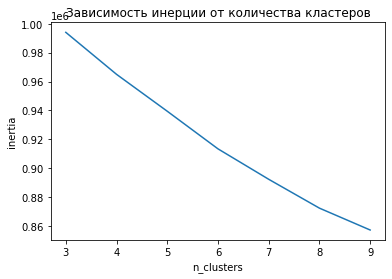

In [16]:
import seaborn as sns

inertia = []

for n in range(3, 10):    
    kmeans = KMeans(n_clusters=n,
                random_state=42)    
    kmeans.fit_predict(X_norm)    
    inertia.append(round(kmeans.inertia_))
        
n_clusters_inertia = pd.DataFrame({
    'n_clusters':range(3, 10),
     'inertia':inertia
})

sns.lineplot(x = n_clusters_inertia['n_clusters'],
             y = n_clusters_inertia['inertia'],
             ).set_title('Зависимость инерции от количества кластеров');
    
    

2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

    **Внимание**: программа может выполняться несколько минут — будьте готовы подождать.

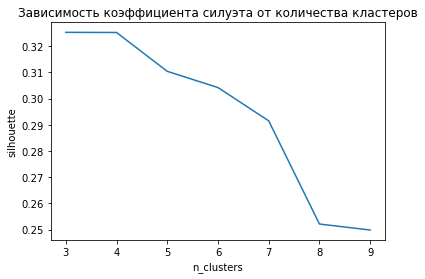

In [17]:
from sklearn.metrics import silhouette_score

silhouette = []

for n in range(3, 10):    
    kmeans = KMeans(n_clusters=n,
                random_state=42)    
    kmeans.fit_predict(X_norm)    
    silhouette.append(silhouette_score(X_norm, kmeans.labels_))
        
n_clusters_silhouette = pd.DataFrame({
    'n_clusters':range(3, 10),
     'silhouette':silhouette
})

sns.lineplot(
    x = n_clusters_silhouette['n_clusters'],
    y = n_clusters_silhouette['silhouette'],
    ).set_title('Зависимость коэффициента силуэта от количества кластеров');

### Задание 4.6

Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

Отметьте эти слова:

In [18]:
X_norm.shape

(30000, 36)

In [19]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42    
    )    
kmeans.fit_predict(X_norm)    
    


X = pd.DataFrame(data, columns=data.columns)
X.loc[:, 'label'] = kmeans.labels_

In [20]:
top_list = []
for label, group in X.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_10 = set(means.head(10).index)
    top_list.append(top_10)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

### Задание 4.7

Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [21]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(
    n_components=3,
    random_state=42)

label = gm.fit_predict(X_norm)


In [22]:
X = pd.DataFrame(data, columns=data.columns)
X['label'] = label

X['label'].value_counts().sort_values(ascending=False)

0    23426
1     6573
2        1
Name: label, dtype: int64

### Задание 4.8

В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [23]:
X[X['label']==2].iloc[:,:-1].T.sort_values(
    by=int(X[X['label']==2].index[0]), ascending=False)[:3]

,14187
blonde,327
sex,22
hair,12


# 5. DBSCAN

✍ Вы уже изучили два метода кластеризации и даже попрактиковались на кейсе. Однако этих алгоритмов недостаточно, чтобы решить любую задачу, с которой вы столкнётесь, поэтому мы продолжаем наше погружение в алгоритмы кластеризации.

В этом юните мы разберём ещё один вид кластеризации — **DBSCAN**.

Этот алгоритм хорошо подходит для ситуаций, когда необходимо выделить кластеры различной, порой довольно сложной формы. Такая задача достаточно часто возникает при анализе географических данных: например, [при выделении кластеров пользователей по геометкам](https://link.springer.com/article/10.1007/s10708-019-10072-8).

Основная идея этого алгоритма заключается в том, что объект  принадлежит кластеру, если находится достаточно близко ко многим объектам из этого кластера.

На картинке ниже вы видите объекты, которые легко разделяются на три кластера. В такой ситуации можно без проблем применить, например, k-means или EM-алгоритм и получить хороший результат.

![](https://lms.skillfactory.ru/assets/courseware/v1/3eae3103fe2d4ce5139873a5425537d2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_1.png)

Совсем другая ситуация — на рисунках ниже:

![](https://lms.skillfactory.ru/assets/courseware/v1/13a4e494055a056526d63749abb3875f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_2.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/6119e068daf011e97ed24aaa9190ed4e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_3.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/775f443ddc6bf9613560de4d919c0202/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_4.png)

Точки здесь сгруппированы в произвольных формах. Также присутствуют точки-выбросы. К сожалению, те же k-means или EM-алгоритм не смогут кластеризовать такие данные корректно, а вот алгоритмы кластеризации на основе плотности (к которым относится DBSCAN) очень эффективны в таких ситуациях.

Давайте попробуем интуитивно разобраться в этом алгоритме.

Представим, что на вечеринку пришло много людей. Как это обычно бывает, люди стоят небольшими компаниями. Наша задача — выявить эти компании. С первого взгляда кажется, что это несложно. Но что, если группы будут разной формы? Кто-то стоит кругом, кто-то — вдоль барной стойки, а какая-то компания образовала полукруг, чтобы было удобнее смотреть смешное видео с планшета. Есть, разумеется, и одиночки, и пары людей:

![](https://lms.skillfactory.ru/assets/courseware/v1/d60a086e63ddadab73ea7a4a940cc213/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_5.png)

Для того чтобы выделить группы, сначала надо понять, что такое группа:

* Нужен параметр, который будет определять, насколько близко должны стоять люди, чтобы их можно было отнести к одной группе.
* Необходимо решить, какое минимальное число людей может считаться группой. Один человека — это группа? А два, три?

Будем считать, что минимальное число людей в группе — три. Все люди, у которых есть хотя бы три соседа (включая самого рассматриваемого человека), — это центральные элементы группы, их мы отметим зелёным.

Жёлтым отметим тех людей, которые являются граничными элементами, а красным — шумовыми.

![](https://lms.skillfactory.ru/assets/courseware/v1/2e62112c1486f7754ce63a9f2cd14efc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_6.png)

Можно записать этот процесс в виде итеративного алгоритма:

* Берём случайного человека.
* Если рядом с этим человеком стоит меньше трёх других (включая его самого), считаем данного человека одиночкой.
* Если же рядом с человеком стоит не менее трёх людей (включая его самого), тогда:
    * считаем, что этот человек находится в группе;
    * среди людей, которые находятся рядом с ним, есть те, у кого также не менее трёх соседей — добавляем их в эту же группу;
    * если среди людей, которые находятся рядом, есть те, у кого меньше трёх соседей, — это граничные элементы, и они тоже будут относиться к группе.
* Центральные и граничные элементы определены, все остальные — одиночки (шумовые элементы).

Мы рассмотрели, как работает данный алгоритм, на совсем простом примере, без математики. Теперь давайте возьмём вычислительный пример, чтобы лучше разобраться в принципе работы DBSCAN.

Пусть у нас есть девять точек: $x_1(0,0), \ x_2(1,0), \ x_3(1,1), \ x_4(2,2), \ x_5(3,1), \ x_6(3,0), \ x_7(0,1), \ x_8(3,2), \ x_9(6,3).$ Мы хотим кластеризовать их.

Пусть значение min_samples, при котором группа точек становится кластером, будет равно 3. В качестве метрики, по которой мы будем определять, какие точки являются достаточно близкими, чтобы быть в одной группе, возьмём радиус, равный 1 (параметр eps).

Для начала просто изобразим наши точки:

![](https://lms.skillfactory.ru/assets/courseware/v1/ddf05e4a7ac26786a91cbbd1f528820f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_7.png)

Далее для каждой точки найдём точки, которые являются для неё достаточно близкими (считая её саму), то есть попадают в окружность радиуса 1, проведённую с центром в этой точке:

![](https://lms.skillfactory.ru/assets/courseware/v1/07705913476e58cda145f83ee40623ac/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_8.png)


Выпишем множества $N$ близких точек для каждой точки:

$N(x_1) = \{x_1, x_2, x_7\}$

$N(x_2) = \{x_2, x_1, x_3\}$

$N(x_3) = \{x_3, x_2, x_7\}$

$N(x_4) = \{x_4, x_8\}$

$N(x_5) = \{x_5, x_6, x_8\}$

$N(x_6) = \{x_6, x_5\}$

$N(x_7) = \{x_7, x_1, x_3\}$

$N(x_8) = \{x_8, x_4, x_5\}$

$N(x_9) = \{x_9\}$

Поясним, как это можно определить. Конечно, в нашем случае мы могли бы просто посмотреть на картинку с окружностями, приведённую выше. Однако это «ручной» подход, и его нельзя применять на хоть сколько-то больших данных, так что рассмотрим вычислительный вариант.

Возьмём точку $x_1$. Расстояние от неё до $x_2$ равняется:

$\sqrt{(1-0)^2 + (0-0)^2} = 1$

Значит, $x_2$ входит в кластер $x_1$.

А вот если мы посчитаем расстояние от точки $x_1$ до точки $x_3$, оно будет равно:

$\sqrt{(1-0)^2 + (1-0)^2} = \sqrt{2} \approx 1.41$

Это значение больше 1 — значит, точка $x_3$ не является соседом для $x_1$.

Таким образом мы можем проверить все точки и для каждой отобрать те, расстояния до которых не более 1, и те, расстояние до которых превышает 1.

Таким образом мы можем проверить все точки и для каждой отобрать те, расстояния до которых не более 1, и те, расстояние до которых превышает 1.

Давайте выявим центральные, граничные и шумовые точки:

* Для того чтобы определить центральные точки, необходимо найти все точки, у которых есть как минимум три близкие к ним точки, включая саму рассматриваемую точку.  
**Центральные точки**: $\{x_1, x_2, x_3, x_5, x_7, x_8\}$.

* Теперь будем определять граничные точки: те точки, которые не являются центральными, но близки к центральным.  
**Граничные точки**: $\{x_4, x_6\}$.

* И, наконец, точка $x_9$ является шумовой.

Далее, когда мы определили основные точки, необходимо произвести кластеризацию.

* Произвольно выбираем точку — пусть это будет $x_1$.
Теперь надо найти все точки, находящиеся на расстоянии не более eps от этой точки. Для точки $x_1$ такими точками являются $x_2, \ x_3, \ x_7$.
* Точка $x_1$ здесь является точкой, формирующей кластер. Итак, в кластер 1 входят точки $\{x_1, x_2, x_3, x_7\}$.
* Теперь выбираем следующую точку $x_5$ и отбираем все точки, прямо достижимые по плотности из $x_5$: $\{x_5, x_4, x_8, x_6\}$. Это кластер 2.
* Точка $x_9$ остаётся шумовой.

Если визуализировать результат, то мы получаем следующее:

![](https://lms.skillfactory.ru/assets/courseware/v1/e1a3c3013271a31d9884d31627800e56/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_9.png)

Теперь, когда мы буквально вручную реализовали алгоритм DBSCAN, резюмируем всё, что рассмотрели ранее, в более чёткую и формальную структуру.

**Алгоритм DBSCAN инициализируется двумя параметрами:**

* `eps` — расстояние, определяющее окрестности. Две точки считаются достаточно близкими, чтобы находиться в одном кластере, если расстояние между ними меньше или равно eps. В библиотеке sklearn оно по умолчанию равно 0.5.
* `min_samples` — минимальное количество точек в данных, которое может быть в кластере. В библиотеке sklearn оно по умолчанию равно 5.

Эти параметры очень сильно влияют на результат кластеризации, и следует перебирать разные варианты, т. к. их подходящие значения (особенно eps) может быть сложно подобрать. Не стоит опираться только на результаты алгоритма, обученного со значениями по умолчанию. 

На основании этих двух параметров точки классифицируются как **центральные** (их ещё часто называют **корневыми** или **основными**), **граничные** и **шумовые**:

Точка является **центральной**, если в её окрестностях имеется не менее min_samples точек (включая саму точку). Окрестность определяется как область внутри окружности радиуса eps, центр которой находится в центральной точке.

Точка является **граничной**, если она достижима из центральной точки (то есть находится в окрестности центральной точки) и количество точек в её окрестностях меньше min_samples.

Точка называется **шумовой**, если она не является центральной и не достижима ни из одной из центральных точек (то есть не находится в окрестностях центральных точек).

![](https://lms.skillfactory.ru/assets/courseware/v1/a6f28a6e3dbc2dc0a5a99b2478ce70f9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_10.png)

* Если точка $q$ находится от центральной точки $p$ на расстоянии, не превышающем eps, то точку $q$ называют **прямо достижимой по плотности из $p$**.
* Если мы можем составить от точки $p$ до точки $q$ путь $p_1, \ p_2, \ ..., \ p_n$, где $p_1 = p$, $p_n = q$ и где каждая точка $p_{i+1}$ прямо достижима из $p_i$ и является центральной, то точка $q$ называется **достижимой по плотности из $p$**.

Все точки, не достижимые из центральных точек, считаются **шумовыми** (**выбросами**).

Формирование кластеров происходит следующим образом:

* Центральная точка формирует кластер со всеми точками, достижимыми из неё.
* Шумовые точки не включаются в кластеры.

![](https://lms.skillfactory.ru/assets/courseware/v1/65a50d07980f90b2713723772888bcc3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_11.png)

Ниже представлена визуализация работы алгоритма DBSCAN:

![](https://lms.skillfactory.ru/assets/courseware/v1/ee44c3e7c85051aa1a92fa25aba98553/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_5_12.gif)

Здесь вы можете видеть, как от значения eps (обозначено как ) и от значения min_samples (обозначено как minPts) зависит процесс реализации алгоритма, а также итоговый результат.

Давайте вспомним плюсы и минусы алгоритма DBSCAN:

### Плюсы

* не нужно задавать количество кластеров;
* устойчив к шуму и выбросам, может находить выбросы в данных;
* способен найти кластеры любой геометрической формы.

### Минусы

* не может качественно кластеризовать наборы данных с большой разницей в плотности;
* равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным;
* бывает сложно подобрать значение eps.

В этом юните мы изучили алгоритм DBSCAN: подробно рассмотрели его реализацию и даже «вручную» решили с его помощью задачу кластеризации. Осталось познакомиться с последним алгоритмом кластеризации — он ждёт вас уже в следующем юните →

# 6. Агломеративная иерархическая кластеризация

✍ В этом юните мы разберём последний интересующий нас метод кластеризации — **агломеративную иерархическую кластеризацию**. Она применяется, например, для [анализа медицинских данных](https://www.jacc.org/doi/abs/10.1016/j.jcin.2021.08.034) и [решения банковских задач](https://www.sciencedirect.com/science/article/abs/pii/S0020025519312137). После её изучения вы будете разбираться во всех основных алгоритмах кластеризации, а значит, сможете без проблем решать практические задачи.

Иерархическая кластеризация — очень популярный метод кластеризации в силу простоты реализации и интерпретации. По ходу её работы создаются кластеры, организованные в иерархическую структуру. Эту структуру можно визуализировать с помощью древовидной диаграммы, называемой дендрограммой.

Например, ниже вы можете видеть пример дендрограммы, иллюстрирующей «родословную» птиц.

![](https://lms.skillfactory.ru/assets/courseware/v1/b0f229691d0029a15521c3e1f8c11301/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_1.png)

При **агломеративном** подходе кластеризации дендрограмма записывает последовательность слияний, при **дивизионном** — последовательность расщеплений.

### АГЛОМЕРАТИВНЫЙ АЛГОРИТМ

* изначально каждый объект является отдельным кластером;
* на каждом шаге соединяем два самых близких кластера;
* останавливаемся, когда получаем требуемое количество кластеров или единственный кластер.

### ДИВИЗИОННЫЙ (ДИВИЗИВНЫЙ) АЛГОРИТМ

* начинаем с ситуации, когда все объекты входят в один кластер;
* на каждом шаге разделяем один из кластеров пополам;
останавливаемся, когда достигается необходимое количество кластеров или количество кластеров, равное числу объектов.

Ниже представлены схемы дендрограмм для агломеративной и дивизионной иерархической кластеризации:

![](https://lms.skillfactory.ru/assets/courseware/v1/96ae60495d59e3fa8f7c01fb4545fd33/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_2.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/df2c40a443f0e25aad6db4831ca703da/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_3.png)


Чтобы лучше понять, что показывает дендрограмма, можно сравнить картинку с разделением на кластеры (слева), аналогичные которой мы уже рассматривали в предыдущих юнитах, и непосредственно дендрограмму (справа):

![](https://lms.skillfactory.ru/assets/courseware/v1/c3c57918796e1f1f9fd3d8ac9efbbb87/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_4.png)

Например, слева мы видим, что изначально в самые маленькие внутренние кластеры объединились E и F, I и H, J и K, B и C. Справа мы также видим объединение этих кластеров на самом первом (нижнем) уровне дендрограммы. Далее слева видно, что к кластеру с элементами E и F присоединился элемент D. На дендрограмме справа мы также видим это присоединение в крайней правой ветви. Так можно провести полную аналогию между этими двумя схемами.

Ниже можно увидеть иллюстрацию процесса построения кластеров в «режиме реального времени»:

![](https://lms.skillfactory.ru/assets/courseware/v1/1933bc19ea9872cf4edcd276c8e192be/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_5.gif)

В данном юните мы будем рассматривать только агломеративный иерархический подход, т. к. именно он реализован в библиотеке sklearn и используется при решении задач машинного обучения. Его общую концепцию вы уже знаете — теперь необходимо разобраться в некоторых математических тонкостях.

Рассмотрим реализацию алгоритма на примере ↓

Пусть есть группа людей, для которых мы знаем рост и вес, и на основе этих значений хотим разделить людей на кластеры.

-|Рост|Вес
-|-|-
$P_0$|185|72
$P_1$|170|56
$P_2$|168|60
$P_3$|179|68
$P_4$|182|72
$P_5$|188|77

Для начала будем считать, что каждая точка — это отдельный кластер.

Теперь рассчитаем все попарные расстояния между точками:

Теперь рассчитаем все попарные расстояния между точками:

-|$P_0$|$P_1$|$P_2$|$P_3$|$P_4$|$P_5$
-|-|-|-|-|-|-
$P_0$|0|||||
$P_1$|21.93|0||||
$P_2$|20.81|4.47|0|||
$P_3$|7.21|15|13.6|0||
$P_4$|3|20|18.44|5|0|
$P_5$|5.83|27.66|26.25|12.73|7.81|0

На главной диагонали в данной таблице стоят нули, так как, разумеется, у каждой точки расстояние до самой себя равно нулю. Остальные расстояния мы вычислили как евклидовы расстояния.

Например, расстояние между точками $P_4$ и $P_0$ будет выражаться следующим образом:

$\sqrt{(185-182)^{2}+(72-72)^{2}}=\sqrt{9}=3$

Все остальные расстояния были вычислены так же, а их значения были округлены до сотых.

Между кластерами $P_4$ и $P_0$ самое маленькое расстояние — объединяем их в один кластер. Теперь у нас осталось пять кластеров:

-|$[P_0, P_4]$|$P_1$|$P_2$|$P_3$|$P_5$|
-|-|-|-|-|-
$[P_0, P_4]$|0||||
$P_1$|20|0|||
$P_2$|18.44|4.47|0||
$P_3$|5|15|13.6|0|
$P_5$|5.83|27.66|26.25|12.73|0

В таблице появились новые значения: расстояния от $[P_0, P_4]$ до всех других кластеров, состоящих из одной точки. Расстояние для кластеров, в которых содержится более одной точки, уже невозможно вычислить, просто используя евклидово расстояние.

Что же делать? Будем вычислять расстояния для всех точек кластера и выбирать минимальное. То есть, к примеру, если мы хотим найти расстояние от точки $P_2$ до кластера $[P_0, P_4]$, то отдельно рассчитаем расстояние от $P_2$ до $P_0$, потом — от $P_2$ до $P_4$ и в итоге возьмём минимальное из двух полученных чисел:

$d(P_2,[P_0,P_4])= min(d(P_2,P_0),d(P_2,P_4)) = min( 20.81, 18.44 ) = 18.44$

**Примечание**. На самом деле не всегда берётся минимальное расстояние — есть и другие подходы, которые мы разберём чуть позднее.

Итак, расстояния вычислены — можно идти дальше. Ищем следующую пару кластеров с минимальным расстоянием — теперь это $P_1$ и $P_2$. Объединяем их в один кластер. Получаем такой результат:

-|$[P_0, P_4]$|$[P_1, P_2]$|$P_3$|$P_5$
-|-|-|-|-
$[P_0, P_4]$|0|||
$[P_1, P_2]$|18.44|0||
$P_3$|5|13.6|0|
$P_5$|5.83|26.25|12.73|0

Вновь смотрим на все имеющиеся расстояния и видим, что пара с минимальным расстоянием — это $P_3$ и $[P_0, P_4]$. Объединяем эти кластеры:

-|$[P_3,[P_0,P_4]]$|$[P_1,P_2]$|$P_5$
-|-|-|-
$[P_3,[P_0,P_4]]$|0||
$[P_1,P_2]$|13.6|0|
$P_5$|5.83|26.25|0

Ищем минимальное расстояние в последний раз — теперь это $[P_3,[P_0,P_4]]$ и $P_5$. Объединяем и эту пару:

-|$[P_5, [P_2,[P_0,P_4]]]$|$[P_2,P_3]$
-|-|-
$[P_5, [P_2,[P_0,P_4]]]$|0|
$[P_2,P_3]$|13.6|0

На следующей итерации оставшиеся два кластера объединяются в один, и на этом реализация алгоритма заканчивается.

Можно проиллюстрировать получившийся в данном примере результат с помощью дендрограммы:

![](https://lms.skillfactory.ru/assets/courseware/v1/c971e70bf5fec2ac45aea0e45b1122ef/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_11.png)

По оси абсцисс отложены кластеры, а по оси ординат — расстояние между кластерами на момент слияния. Если провести линию на уровне интересующего нас расстояния, то мы сможем увидеть, какое количество кластеров было в тот момент. Например, для расстояния, равного 4, мы можем наблюдать пять кластеров, так как у красной пунктирной линии пять пересечений с вертикальными линиями:

![](https://lms.skillfactory.ru/assets/courseware/v1/a21771f5eb1305b83a1180bcb0f27a80/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_12.png)

Также итоговое разбиение на два кластера в нашем примере можно проиллюстрировать следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/b806f734109566ef1f3a61e129dea5b0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_13.png)

Итак, мы рассмотрели на примере алгоритм реализации агломеративной иерархической кластеризации. Однако осталось ещё два вопроса, которые нас волнуют с точки зрения математики:

* Всегда ли расстояние между двумя точками рассчитывается как евклидово расстояние?
* Всегда ли итоговое расстояние между двумя кластерами с несколькими точками рассчитывается как минимальное из всех вычисленных расстояний?

Начнём с первого вопроса. На самом деле, расстояние можно вычислять различными способами. В библиотеке sklearn для вычисления расстояний предлагается несколько вариаций — вот наиболее популярные из них:


1. **Евклидово расстояние**:

    $$d\left(a, b\right)=\sqrt{\sum_{i}^{N}\left(a_i-b_i\right)^{2}}$$

    Если у нас есть точка $a (3,1)$ и точка $b (-3,9)$, то расстояние между ними будет вычисляться следующим образом:

    $\sqrt{(3-(-3))^{2}+(1-9)^{2}}= \sqrt{36+64}=10$

2. **Расстояние городских кварталов (манхэттенское расстояние)**:

    Если у нас есть точка $a (3,1)$ и точка $b (-3,9)$, то расстояние между ними будет вычисляться следующим образом:

    $$d\left(a, b\right)=\sum_{i}^{N}\left|a_{i}-b_{i}\right|$$

    На иллюстрации ниже представлено сравнение евклидова и манхэттенского расстояний:

    $\left|(3-(-3)) \right| + \left|(1-9) \right| = 6 + 8 = 14$

    ![](https://lms.skillfactory.ru/assets/courseware/v1/dc908e6a1b9a019c29e8a873cd46376f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_14.png)

3. **Косинусная мера близости**

    Это метрика, которая показывает не расстояние, а близость векторов (насколько маленький угол между ними). Чем больше её значение, тем ближе векторы друг к другу (максимально близки они в том случае, если совпадают). В числителе находится скалярное произведение, а в знаменателе — произведение длин векторов:

    $$d(a, b)=\frac{\langle a, b\rangle}{\|a\| \cdot\|b\|}$$

    Пусть у нас есть векторы с началом в $(0, 0)$ и с окончаниями в точках $a(3, 1)$ и $b(-3, 9)$. Тогда значение косинусной близости будет равно:

    $\frac{3 \cdot(-3)+1 \cdot 9}{\sqrt{3^{2}+1^{2}} \cdot \sqrt{(-3)^{2}+9^{2}}}=\frac{-9+9}{\sqrt{10} \cdot \sqrt{90}}=0$



Отлично, мы разобрались с тем, как можно находить расстояния между двумя точками.

? Теперь нас интересует следующий вопрос: как вычислить расстояния между двумя кластерами, если хотя бы в одном из них более одного объекта? То есть нам нужна метрика, как-то обобщающая попарные расстояния между точками кластеров. Таких метрик несколько.

Расстояния между условными кластерами $A$ и $B$ можно вычислить с помощью одной из следующих формул:

1. > **Single linkage** — метод одиночной связи (минимум попарных расстояний между точками из двух кластеров):
    >
    > $$\min \{d(a, b): a \in A, b \in B\}$$

    ![](https://lms.skillfactory.ru/assets/courseware/v1/0a0499f2539af31b74072639ae70ea2a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_15.png)

    Пусть у нас есть два кластера:

    * $A$ с точками $a_1 (1,2)$ и $a_2 (3,2)$;
    * $B$ c точками $b_1 (4,1)$ и $b_2 (5,1)$.
    
    Найдём расстояние между ними с помощью метода одиночной связи.

    Для начала найдём все попарные расстояния:

    * $d\left(a_{1}, b_{1}\right)=\sqrt{(4-1)^{2}+(1-2)^{2}}=\sqrt{10}$
    * $d\left(a_{1}, b_{2}\right)=\sqrt{(5-1)^{2}+(1-2)^{2}}=\sqrt{17}$
    * $d\left(a_{2}, b_{1}\right)=\sqrt{(4-3)^{2}+(1-2)^{2}}=\sqrt{2}$
    * $d\left(a_{2}, b_{2}\right)=\sqrt{(5-3)^{2}+(1-2)^{2}}=\sqrt{5}$

    Теперь нам необходимо взять минимум. Значит, находим минимальное значение из найденных — $\sqrt{2}$.



2. > **Complete linkage** — метод полной связи (максимум попарных расстояний между точками из двух кластеров):
    >
    > $$\max \{d(a, b): a \in A, b \in B\}$$

    ![](https://lms.skillfactory.ru/assets/courseware/v1/9bdbff6dfabe8e442228cba32ad2d74b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_16.png)

    Пусть у нас есть два кластера:

    * $A$ с точками $a_1 (1,2)$ и $a_2 (3,2)$;
    * $B$ c точками $b_1 (4,1)$ и $b_2 (5,1)$.

    Найдём расстояние между ними с помощью метода полной связи.

    Попарные расстояния мы уже рассчитали в предыдущем пункте, поэтому здесь можем просто взять максимум — он будет равен $\sqrt{17}$.

3. > **Average linkage** — метод средней связи (среднее арифметическое попарных расстояний между точками из двух кластеров):
    >
    > $$\frac{1}{\left|A \right| *\left|B \right|} \sum_{a \in A} \sum_{b \in B} d(a, b)$$

    Пусть у нас есть два кластера:

    * $A$ с точками $a_1 (1,2)$ и $a_2 (3,2)$;
    * $B$ c точками $b_1 (4,1)$ и $b_2 (5,1)$.

    Найдём расстояние между ними с помощью метода средней связи.

    Попарные расстояния мы уже нашли, так что для применения метода  средней связи просто берём среднее арифметическое:

    $\frac{\sqrt{10}+\sqrt{17}+\sqrt{2}+\sqrt{5}}{4} \approx 2.73$



4. > **Centroid linkage** — центроидный метод (расстояние между центроидами двух кластеров):
    >
    > $$d = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$$

    Координаты центроида кластера : $p = (p_1, p_2)$;
    
    Координаты центроида кластера : $q = (q_1, q_2)$.
    
    ![](https://lms.skillfactory.ru/assets/courseware/v1/4fbd26f66506d3ca32b31a3d557ec911/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_18.png)

    Пусть у нас есть два кластера:

    * $A$ с точками $a_1 (1,2)$ и $a_2 (3,2)$;

    * $B$ c точками $b_1 (4,1)$ и $b_2 (5,1)$.

    Найдём расстояние между ними с помощью центроидного метода.

    Для начала найдём непосредственно центроиды:

    * Координаты центроида для кластера $A$:

    $(1+3)/2 = 2 \ и \ (2+2)/2 = 2$;

    * Координаты центроида для кластера $B$: 

    $(4+5)/2 = 4.5 \ и \ (1+1)/2 = 1$.

    Теперь необходимо найти расстояние между центроидами, то есть ищем  расстояние между точками $p (2, 2)$ и $p (4.5, 1)$:

    $\sqrt{(4.5-2)^{2}+(1-2)^{2}}=\sqrt{2.5^{2}+1} \approx 2.69$



Стоит помнить, что использование методов средней и полной связи приносит хорошие результаты, только если данные имеют высокую плотность и не пересекаются или однородно распределены. В остальных случаях данные методы отрабатывают плохо и стоит использовать метод одиночной связи.

Ранее вы уже рассматривали сравнение методов поиска расстояний на разных данных — приведём его и здесь для повторения:

![](https://lms.skillfactory.ru/assets/courseware/v1/e5491b5a6564a89c3d766f263d46ff5f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_6_19.png)



Итак, мы разобрали все основные моменты, касающиеся математической части метода агломеративной иерархической кластеризации.

Резюмируем **последовательность действий**:

1. Сначала каждый элемент определяем как отдельный кластер.
2. Далее итеративно, пока не останется один кластер,
    * находим два ближайших кластера,
    * объединяем их.

Для реализации алгоритма в sklearn вам понадобится [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Обычно ему передают следующие параметры:

* `n_clusters` — количество кластеров; по умолчанию — 2.
* `linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше.
* `affinity` — метод определения расстояний между точками (например, евклидово или манхэттенское).

Повторим основные плюсы и минусы агломеративной иерархической кластеризации:

### Плюсы

* можно построить дендрограмму и понять, как устроены данные;
* работает даже на небольшом датасете.

### Минусы

* необходимо выбирать оптимальное количество кластеров либо оптимальное расстояние в момент инициализации алгоритма;
* если данных много, дендрограмма становится большой и сложной для понимания;
* может неравномерно разделять данные на кластеры.

В данном юните мы рассмотрели последний интересующий нас алгоритм кластеризации — агломеративную иерархическую кластеризацию. Мы разобрали поэтапно шаги реализации данного метода, а также все связанные с ним математические выкладки. Уже в следующем юните вы сможете закрепить на практике знания по всем изученным алгоритмам кластеризации →

# 7. Итоговая практика по алгоритмам кластеризации

В нашем распоряжении есть [данные](https://lms.skillfactory.ru/assets/courseware/v1/19c4fca978e965957f2f15ccee9523e6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/CC_GENERAL.zip) о 8950 держателях кредитных карт одного из банков Нью-Йорка. Банк собрал достаточно много данных об этих людях и о том, как они пользовались кредитными картами за последние полгода.

Маркетологи хотят запустить рекламную кампанию, однако для этого необходимо произвести сегментацию клиентов, чтобы сделать акционное предложение более персонализированным. Мы попробуем использовать все известные нам методы кластеризации и посмотрим на получившиеся результаты.

![](https://lms.skillfactory.ru/assets/courseware/v1/74038139a886991d7d5432cdbc737027/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md10_7_1.jpg)

### Информация о клиентах

* CUST_ID — идентификационный номер держателя карты;
* BALANCE — баланс, доступный для совершения покупок;
* BALANCEFREQUENCY — как часто обновляется показатель баланса (1 — часто, 0 — нечасто);
* PURCHASES — количество покупок, оплаченных со счёта;
* ONEOFFPURCHASES — максимальная сумма единовременной покупки;
* INSTALLMENTSPURCHASES — сумма покупок, сделанных в рассрочку;
* PURCHASESFREQUENCY — как часто в целом совершаются покупки (1 — часто, 0 — нечасто);
* ONEOFFPURCHASESFREQUENCY — частота совершения единовременных покупок (1 — часто, 0 — нечасто);
* PURCHASESINSTALLMENTSFREQUENCY — частота совершения покупок в рассрочку (1 — часто, 0 — нечасто);
* CASHADVANCEFREQUENCY — частота внесения авансовых платежей;
* CASHADVANCETRX — количество транзакций с авансовыми взносами;
* PURCHASESTRX — количество совершённых транзакций с покупками;
* CREDITLIMIT — кредитный лимит держателя карты;
* PAYMENTS — сумма платежей пользователя;
* MINIMUM_PAYMENTS — сумма минимального платежа пользователя;
* PRCFULLPAYMENT — выплаченный процент от полного платежа;
* TENURE — срок обслуживания кредитной карты.

### Задание 7.2

Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [24]:
data = pd.read_csv('data/CC_GENERAL.zip')

data.isnull().sum().sum()

314

### Задание 7.3

Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [25]:
data.fillna({
    'CREDIT_LIMIT' : data['CREDIT_LIMIT'].mean(),
    'MINIMUM_PAYMENTS': data['MINIMUM_PAYMENTS'].mean()
    },
            inplace=True)   

round(data['MINIMUM_PAYMENTS'].mean(), 2)

864.21

### Задание 7.4

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [26]:
df = data.drop(columns = ['CUST_ID'])

scaler = StandardScaler()

df_norm = scaler.fit_transform(df)

df_norm[0][0].round(2)

-0.73

### Задание 7.5

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

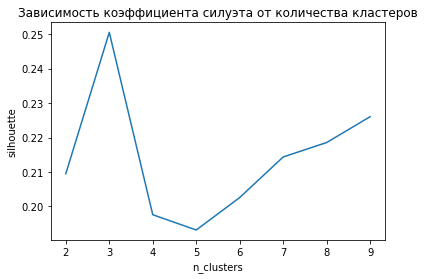

In [27]:
from sklearn.metrics import silhouette_score

silhouette = []

for n in range(2, 10):
    kmeans = KMeans(
        n_clusters=n,
        random_state=42) 
    kmeans.fit_predict(df_norm)    
    silhouette.append(silhouette_score(df_norm, kmeans.labels_))
        
n_clusters_silhouette = pd.DataFrame({
    'n_clusters':range(2, 10),
    'silhouette':silhouette
})

sns.lineplot(
    x = n_clusters_silhouette['n_clusters'],
    y = n_clusters_silhouette['silhouette'],
    ).set_title('Зависимость коэффициента силуэта от количества кластеров');

### Задание 7.6

Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [28]:
X = pd.DataFrame(
    df_norm,
    columns=df.columns)

kmeans = KMeans(
    n_clusters=3,
    random_state=42) 

X['LABEL'] = kmeans.fit_predict(X) 

X.groupby(by=['LABEL']).count().iloc[:,0].sort_values().iloc[0]

1235

### Задание 7.7

Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

db.fit(df_norm)

db.labels_

len(set(db.labels_))

39

### Задание 7.8

В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [30]:
import numpy as np

silhouette = pd.DataFrame({
    'eps':[],
    'min_samples':[],
    'silhouette':[]
})

for eps in np.arange(0.1,3,0.2):
    for min_samples in range(1,20,4):
        db = DBSCAN(eps=eps,
                    min_samples = min_samples)
        db.fit(df_norm)
        silhouette=silhouette.append(
            {
            'eps':eps, 
            'min_samples': min_samples,
            'silhouette' : silhouette_score(df_norm, db.labels_)
            },
            ignore_index=True)
        
best_params = silhouette.sort_values(
    by='silhouette', ascending=False).iloc[0].round(2)

best_params
        
        
        

eps            2.90
min_samples    5.00
silhouette     0.62
Name: 71, dtype: float64

### Задание 7.9

Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

In [31]:
from sklearn.cluster import AgglomerativeClustering

silhouette = pd.DataFrame({
    'n_clusters':[],
    'silhouette':[]
})


for n in range(3,10):
    agg = AgglomerativeClustering(
        n_clusters=n
    )
    agg.fit(df_norm)
    silhouette=silhouette.append(
        {
        'n_clusters': n, 
        'silhouette' : silhouette_score(df_norm, agg.labels_)
        },
        ignore_index=True)
        
best_params = silhouette.sort_values(
    by='silhouette', ascending=False).iloc[0].round(2)

best_params

n_clusters    6.00
silhouette    0.17
Name: 3, dtype: float64

### Задание 7.10

Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [32]:
agg = AgglomerativeClustering(
        n_clusters=int(best_params['n_clusters'])
    )

agg.fit(df_norm)

X['LABEL'] = agg.labels_

X.groupby(by=['LABEL']).count().iloc[:,0].sort_values(ascending=False)

LABEL
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: BALANCE, dtype: int64

Давайте визуализируем результаты кластеризации k-means, отобразив два признака — количество покупок и кредитный лимит:

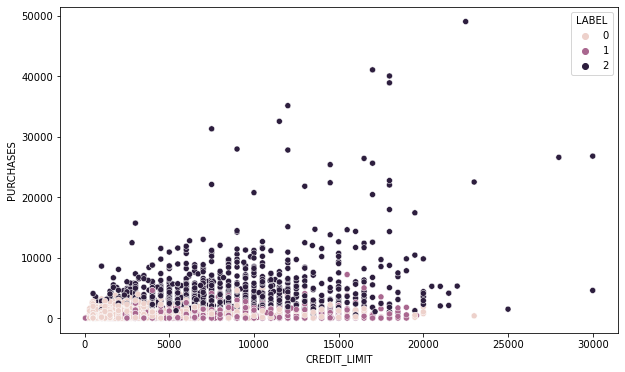

In [33]:
from matplotlib import pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_norm)
df['LABEL'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='LABEL')
plt.show()

Мы видим, что практически все точки очень плотно сконцентрированы вместе, так что наши результаты с другими алгоритмами вполне предсказуемы.

С точки зрения интерпретации на графике явно выделяется группа тех, кто совершает много покупок по кредитной карте, и тех, кто совершает их меньше и имеет меньший кредитный лимит.

Но, разумеется, это лишь приблизительная интерпретация, ведь качественного разбиения с помощью большинства методов мы так и не получили, а кроме того, здесь мы видим лишь два признака из многих, на основе которых осуществлялась кластеризация.

Такая проблема с выделением кластеров часто возникает с данными, в которых много признаков. Для того чтобы её решить, можно, например, применять снижение размерности — в следующем модуле мы как раз поработаем с соответствующими методами и научимся преодолевать такие ситуации.

⭐ А пока поздравляем вас — вы полностью изучили методы кластеризации, и теперь осталось лишь немного повторить пройденное в итоговом юните →

# 8. Итоги

⭐ Поздравляем вас с завершением очередного модуля! В нём мы:

* разобрались с математической составляющей наиболее популярных     * алгоритмов кластеризации:
    * k-means;
    * иерархической кластеризации;
    * EM-алгоритма кластеризации;
    * DBSCAN.
* узнали, как находить оптимальное количество кластеров, используя для этого:
    * метод локтя;
    * коэффициент силуэта.
* решили два кейса, в которых отработали навыки решения практических задач с помощью кластерного анализа.

В следующем модуле мы продолжим углубляться в изучение кластеризации, разберёмся с метриками оценки качества результатов, а также погрузимся в снижение размерности и визуализацию результатов.

Если вам интересно изучить **дополнительные материалы** о кластеризации, рекомендуем ознакомиться со следующими источниками:

* [Более углублённые лекции по различным алгоритмам кластеризации](https://lms.skillfactory.ru/assets/courseware/v1/5e57fa588e5a83b0328520bebbc2279d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Voron-ML-Clustering.pdf)
* [Кластерный анализ в биоинформатике](https://biomolecula.ru/articles/klasternyi-analiz-i-dilemma-biologicheskogo-polzovatelia)
* [Кластеризация текстов](https://lambda-it.ru/post/klasterizatsiia-teksta-s-pomoshchiu-k-means-i-tf-i)